# **SESSION 3: PCA EXERCISE**
by Christian Mata (christian.mata@upc.edu)

#Data Visualization and Dimensionality Reduction with Seeds

---

Dataset

---



This notebook demonstrates how to explore and visualize the `seeds.csv` dataset using **data visualization**, **Principal Component Analysis (PCA)**, and **t-SNE** for dimensionality reduction.

---

In [2]:
import io
import pandas as pd

# Mount Google Drive (if dataset is stored there)
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DAPR/Lab/input/seeds.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,AREA,PERIMETER,COMPACTNESS,LENGTH,WIDTH,ASSYMMETRY_COEFFICIENT,GROOVE_LENGTH,TYPE
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## 1. Explore Dataset

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Info and summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AREA                    140 non-null    float64
 1   PERIMETER               140 non-null    float64
 2   COMPACTNESS             140 non-null    float64
 3   LENGTH                  140 non-null    float64
 4   WIDTH                   140 non-null    float64
 5   ASSYMMETRY_COEFFICIENT  140 non-null    float64
 6   GROOVE_LENGTH           140 non-null    float64
 7   TYPE                    140 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 8.9 KB
None
             AREA   PERIMETER  COMPACTNESS      LENGTH       WIDTH  \
count  140.000000  140.000000   140.000000  140.000000  140.000000   
mean    16.334357   15.215000     0.881794    5.828043    3.461021   
std      2.406400    1.099006     0.015887    0.406740    0.282686   
min     11.230000   12.630000  

## 2. Data Visualization

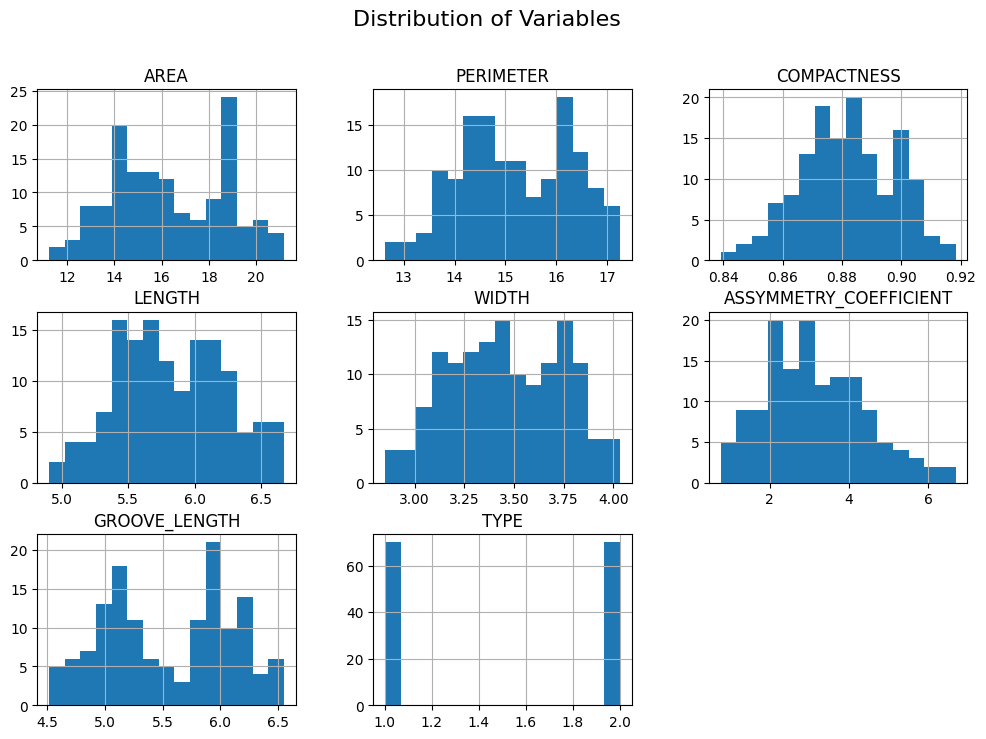

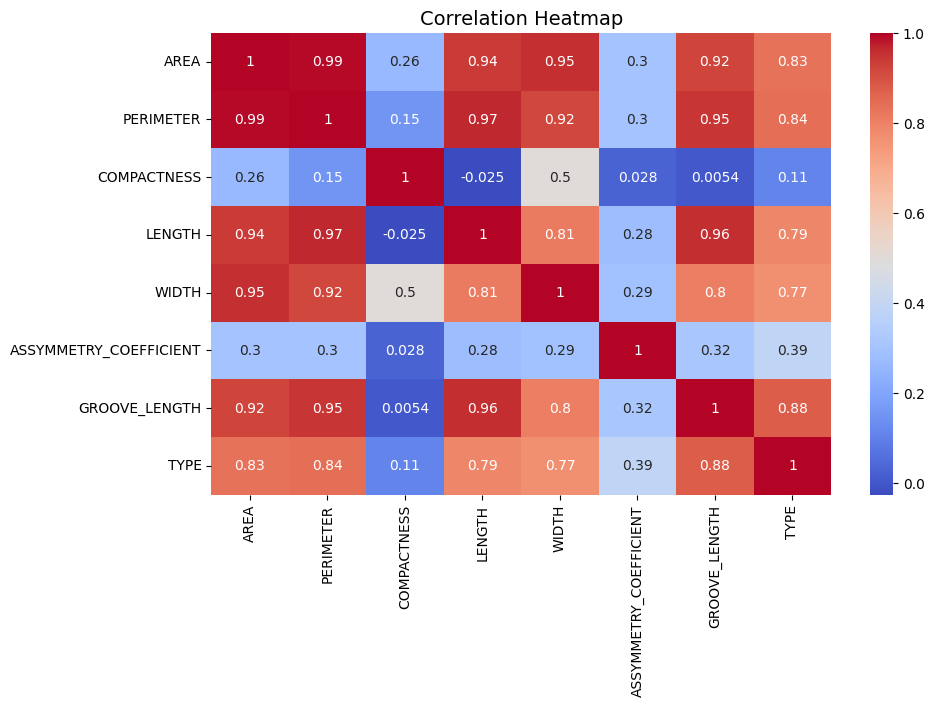

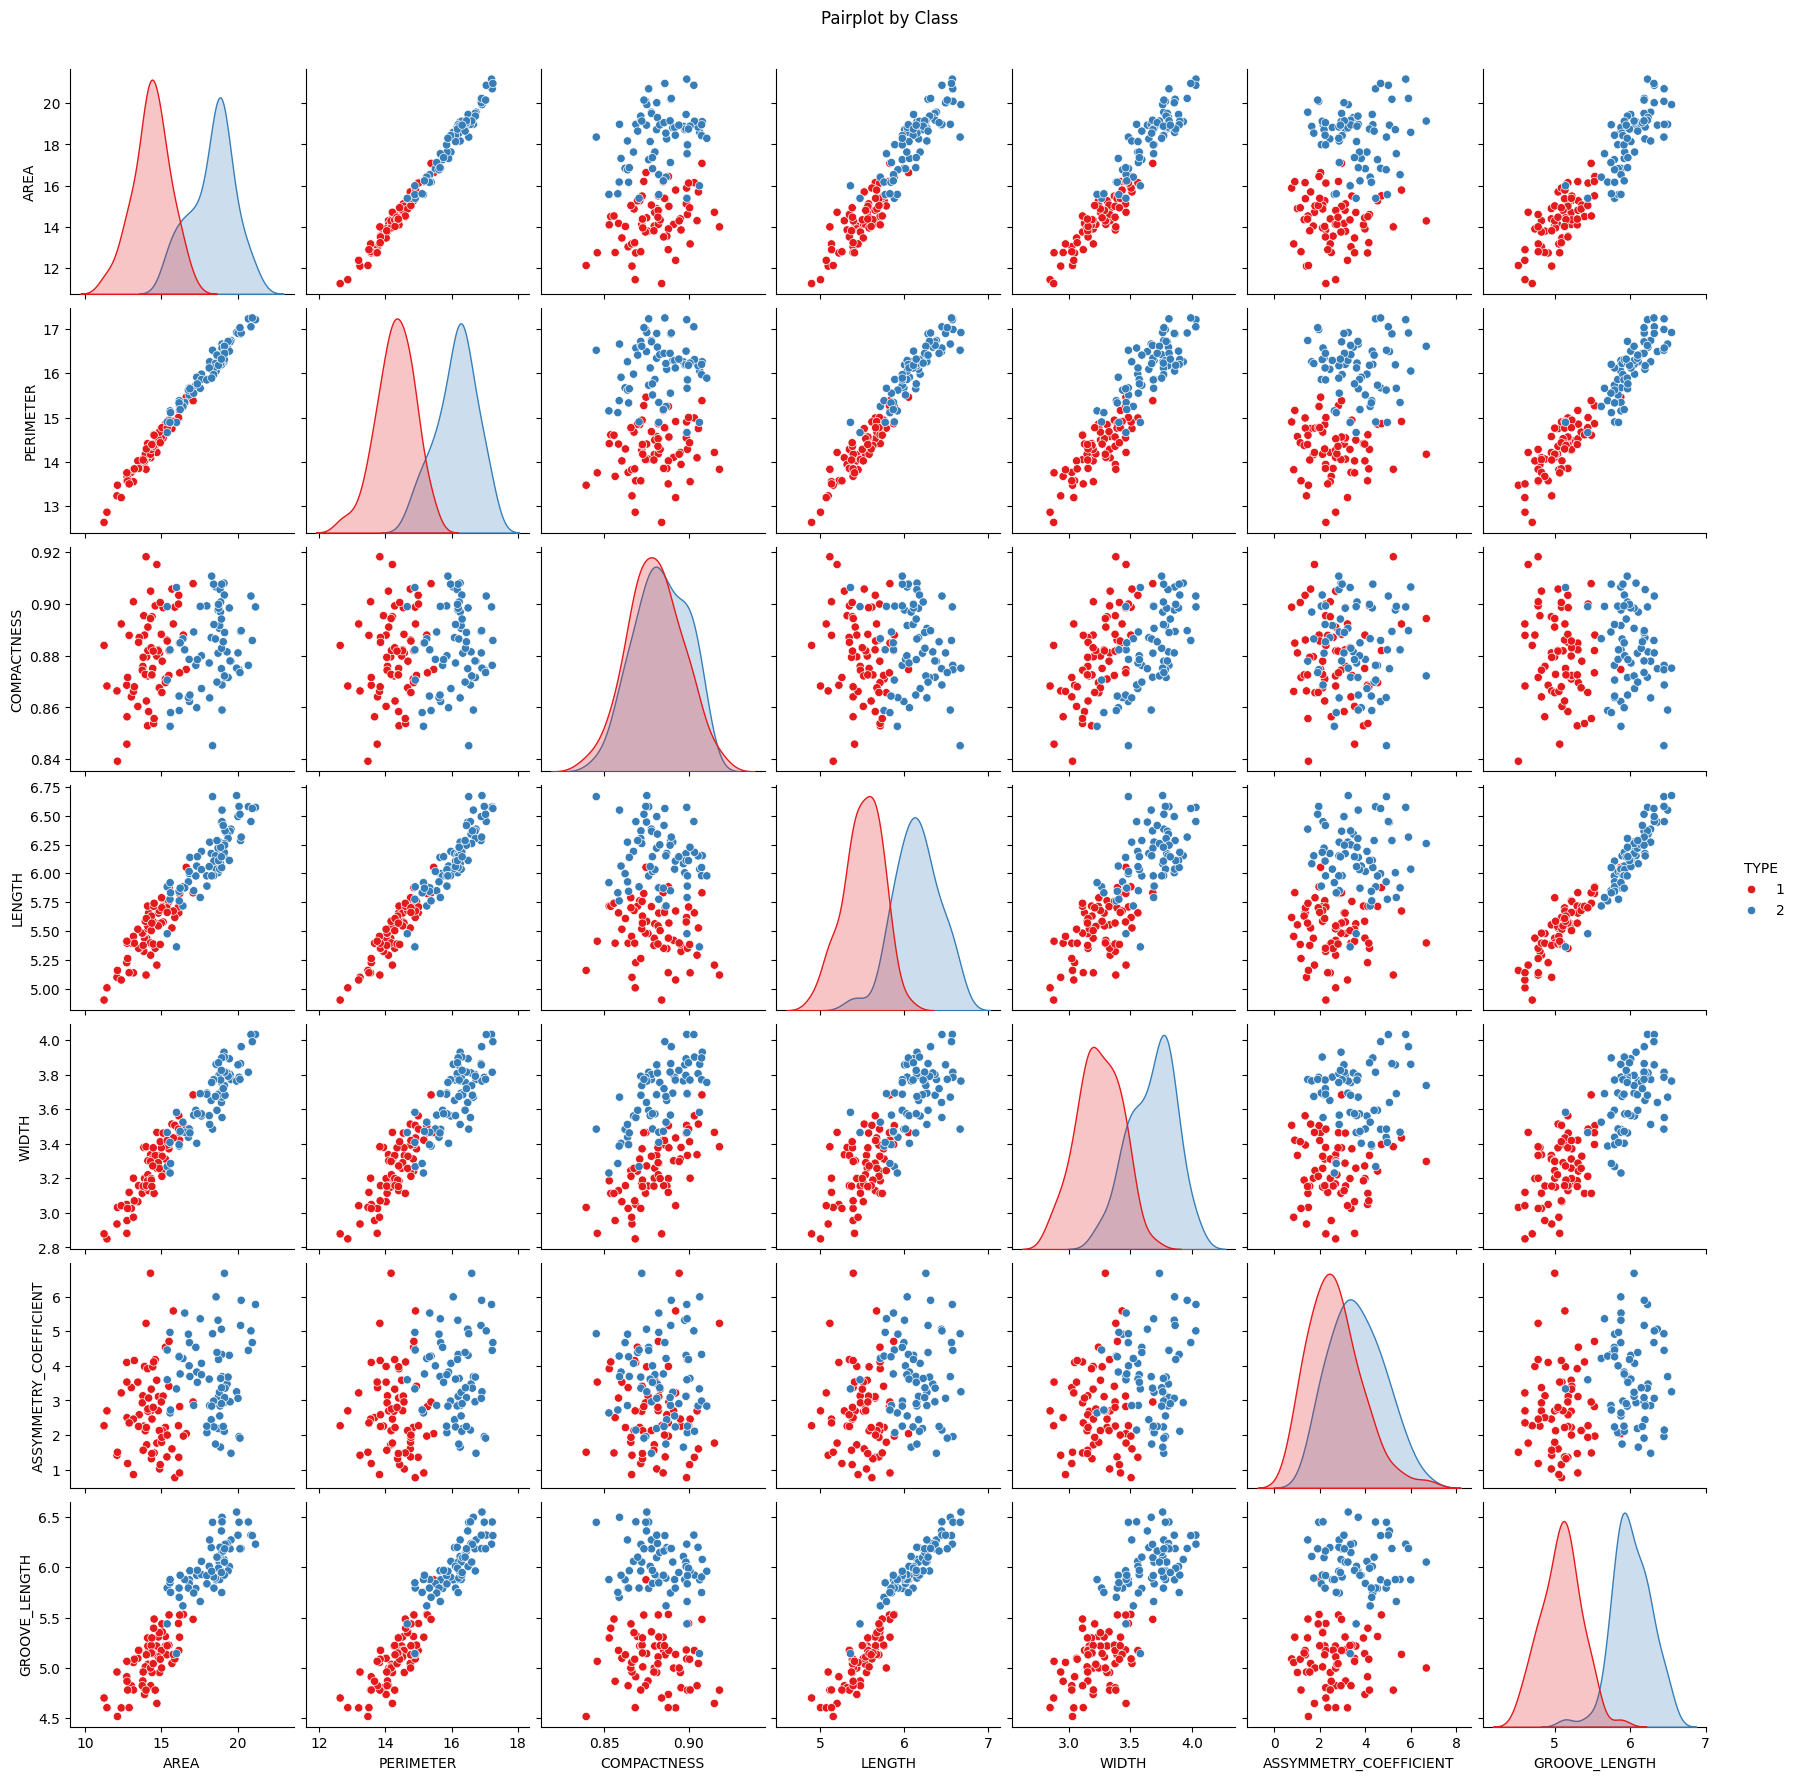

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(12,8), bins=15)
plt.suptitle("Distribution of Variables", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# Pairplot
sns.pairplot(df, hue="TYPE", diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot by Class", y=1.02)
plt.show()

## 3. PCA Analysis

Explained variance ratio: [0.69243434 0.16660085 0.12579941]
Cumulative variance: [0.69243434 0.85903518 0.98483459]


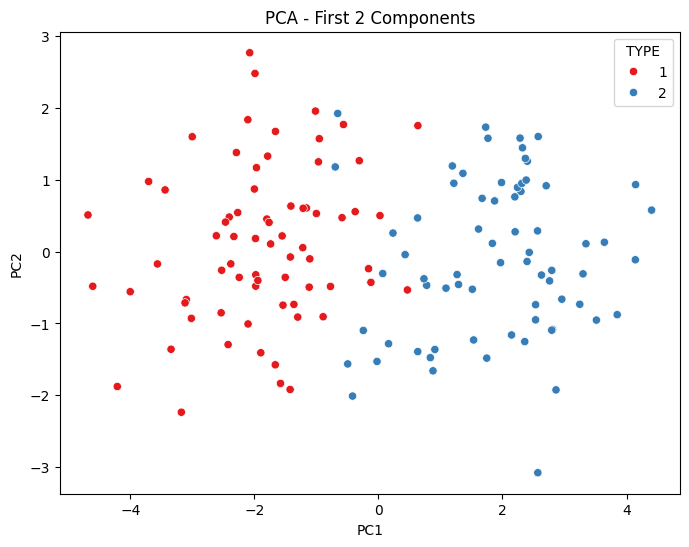

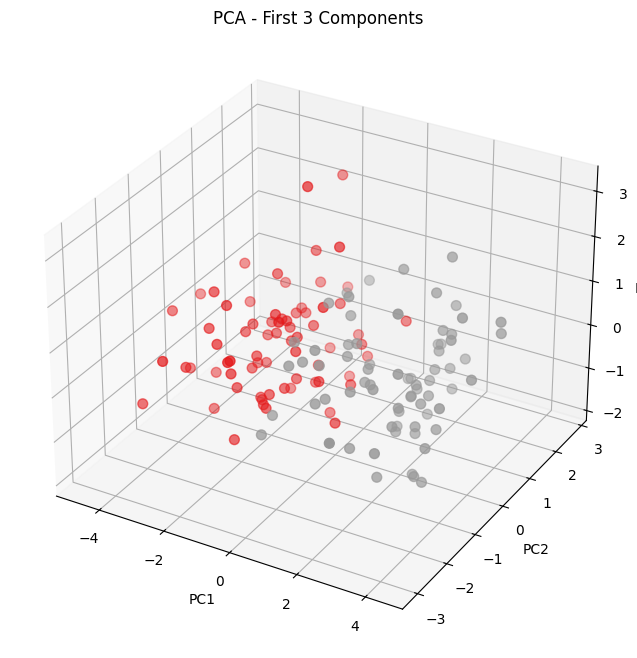

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop("TYPE", axis=1)
y = df["TYPE"]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())

# 2D plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set1")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First 2 Components")
plt.show()

# 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap="Set1", s=50)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA - First 3 Components")
plt.show()

## 4. Dimensionality Reduction with t-SNE

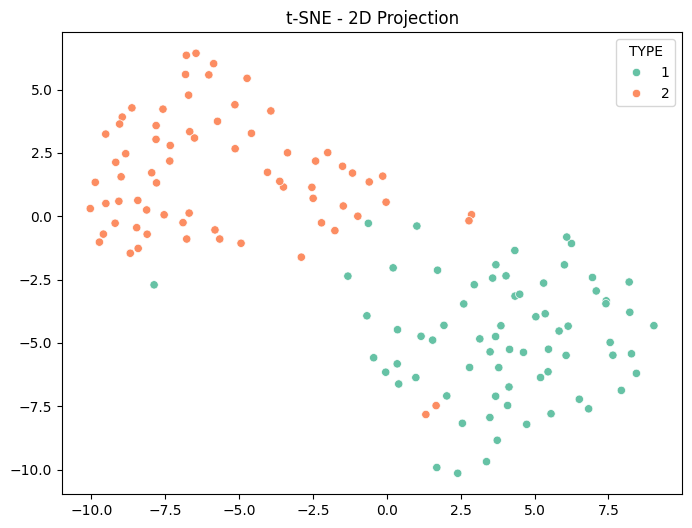

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette="Set2")
plt.title("t-SNE - 2D Projection")
plt.show()

## 5. Conclusions

- Some features are highly correlated, which indicates redundancy.
- The first two principal components explain most of the variance (>80%).
- Both PCA and t-SNE show separation among the seed varieties, though t-SNE provides clearer clusters.
- Dimensionality reduction simplifies high-dimensional data and helps understand relationships between variables.